# Tristan Lotivio
# Project 6
# Due 3/26/2020

# Problem 1

In [2]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display
from keras.utils import plot_model

Using TensorFlow backend.


In [3]:
# First a few tools for this -particular- example...
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [3]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(100,100))
    x = image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x)
    return x

X = np.concatenate([grab_image(r"C:\Users\tclot\Documents\GitHub\coursework\courses\neural\xception_example\images\image_%d.JPEG"%(i)) for i in range(100)])
X.shape

(100, 100, 100, 3)

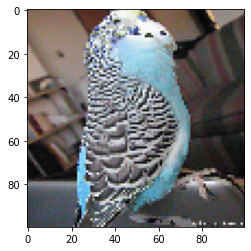

In [4]:
 plt.imshow(image.array_to_img(X[0,:,:,:]))
plt.show()


In [5]:
 # 37 cats in there (label 1, and all else 0)
Y = np.loadtxt(r"C:\Users\tclot\Documents\GitHub\coursework\courses\neural\xception_example\class_labels.csv")
Y = keras.utils.to_categorical(Y)
# Take a look at the first 10...
Y[0:10,:]


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

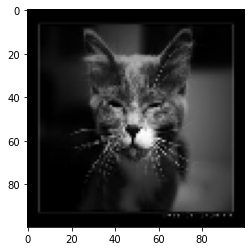

In [6]:
plt.imshow(image.array_to_img(X[4,:,:,:]))
plt.show()

In [7]:
# A convolution net for the cat problem!
model = keras.Sequential()
# Three input channels this time!
model.add(keras.layers.Conv2D(100, kernel_size=(7,7),activation='relu',input_shape=[X.shape[1],X.shape[2],X.shape[3]]))
model.add(keras.layers.Conv2D(128, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(5, 5)))
#model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
# Roughly the same number of parameters!
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 100)       14800     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 128)       320128    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [8]:
batch_size = 8
epochs = 25
history = model.fit(X, Y,
batch_size=batch_size,
epochs=epochs,
verbose=1)


Epoch 1/25
100/100 [==============================] - 6s 62ms/step - loss: 1.3589 - accuracy: 0.6300
Epoch 2/25
100/100 [==============================] - 1s 7ms/step - loss: 0.7161 - accuracy: 0.5900
Epoch 3/25
100/100 [==============================] - 1s 7ms/step - loss: 0.6896 - accuracy: 0.6000
Epoch 4/25
100/100 [==============================] - 1s 7ms/step - loss: 0.6839 - accuracy: 0.6400
Epoch 5/25
100/100 [==============================] - 1s 7ms/step - loss: 0.6635 - accuracy: 0.6400
Epoch 6/25
100/100 [==============================] - 1s 7ms/step - loss: 0.5679 - accuracy: 0.7000
Epoch 7/25
100/100 [==============================] - 1s 7ms/step - loss: 0.4577 - accuracy: 0.7800
Epoch 8/25
100/100 [==============================] - 1s 7ms/step - loss: 0.3233 - accuracy: 0.8700
Epoch 9/25
100/100 [==============================] - 1s 7ms/step - loss: 0.1973 - accuracy: 0.9200
Epoch 10/25
100/100 [==============================] - 1s 7ms/step - loss: 0.1712 - accuracy: 0.940

# Problem 2

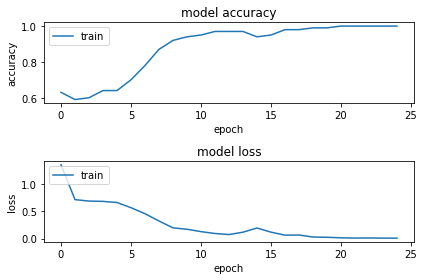

In [9]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()


In [4]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(299,299))
    x = image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x)
    return x

X = np.concatenate([grab_image(r"C:\Users\tclot\Documents\GitHub\coursework\courses\neural\xception_example\images\image_%d.JPEG"%(i)) for i in range(100)])
X.shape

(100, 299, 299, 3)

In [5]:
 # 37 cats in there (label 1, and all else 0)
Y = np.loadtxt(r"C:\Users\tclot\Documents\GitHub\coursework\courses\neural\xception_example\class_labels.csv")
Y = keras.utils.to_categorical(Y)
# Take a look at the first 10...
Y[0:10,:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Problem 3

In [6]:
# Let's load up the model
# This will load up the architecture
# and then the pre-trained weights from the
# internet...
model = Xception(weights='imagenet')
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [11]:
# Just the first image that we say above...
preds = model.predict(X[0:100,:,:,:])
# Decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
for i in range(0,100):
    print('Predicted:', decode_predictions(preds, top=1)[i])

Predicted: [('n01817953', 'African_grey', 0.4484152)]
Predicted: [('n02106550', 'Rottweiler', 0.2995016)]
Predicted: [('n02395406', 'hog', 0.14438196)]
Predicted: [('n02101006', 'Gordon_setter', 0.39297754)]
Predicted: [('n02124075', 'Egyptian_cat', 0.57858545)]
Predicted: [('n02127052', 'lynx', 0.2734329)]
Predicted: [('n02107683', 'Bernese_mountain_dog', 0.9720283)]
Predicted: [('n02123394', 'Persian_cat', 0.55238366)]
Predicted: [('n02093256', 'Staffordshire_bullterrier', 0.4646198)]
Predicted: [('n02123045', 'tabby', 0.2787536)]
Predicted: [('n02123045', 'tabby', 0.24650893)]
Predicted: [('n02124075', 'Egyptian_cat', 0.21868095)]
Predicted: [('n02096585', 'Boston_bull', 0.12376163)]
Predicted: [('n02124075', 'Egyptian_cat', 0.5959538)]
Predicted: [('n02123597', 'Siamese_cat', 0.14513913)]
Predicted: [('n02107312', 'miniature_pinscher', 0.09950588)]
Predicted: [('n02106662', 'German_shepherd', 0.38134515)]
Predicted: [('n02123045', 'tabby', 0.4741673)]
Predicted: [('n04254680', 'soc